Data Trends:
1) Most of the rides occur in urban cities, 68.4%.
2) Rural areas have a smaller number of total rides but average fares trend higher than in urban cities.
3) Suburban city types have higher average fares than urban, generating 30.5% of the total fares. Interestingly, 16.5% of the total drivers are suburban. This suggest suburban drivers are more productive than their urban counterparts.
4) Most drivers, 80.9%, drive in urban areas.

In [ ]:
#### %matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data

# Combine the data into a single dataset

# Display the data table for preview


In [2]:
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")
merged_dataset = pd.merge(ride_data, city_data, how="left", on=["city", "city"])
merged_dataset

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2018-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2018-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2018-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2018-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2018-03-09 06:26:29,42.81,5327642267789,33,Urban


## Bubble Plot of Ride Sharing Data

In [8]:
average_per_city=merged_dataset.groupby(["city"]).mean()["fare"]
average_per_city

city
Amandaburgh         24.641667
Barajasview         25.332273
Barronchester       36.422500
Bethanyland         32.956111
Bradshawfurt        40.064000
                      ...    
West Robert         25.123871
West Samuelburgh    21.767600
Williamsonville     31.875000
Williamsstad        24.362174
Williamsview        26.599000
Name: fare, Length: 120, dtype: float64

In [9]:
total_count_per_city=merged_dataset.groupby(["city"]).count()["fare"]
total_count_per_city

city
Amandaburgh         18
Barajasview         22
Barronchester       16
Bethanyland         18
Bradshawfurt        10
                    ..
West Robert         31
West Samuelburgh    25
Williamsonville     14
Williamsstad        23
Williamsview        20
Name: fare, Length: 120, dtype: int64

In [10]:
drivers_per_city=city_data
drivers_per_city=drivers_per_city.set_index("city")
driver_count_per_city=drivers_per_city.groupby(["city"]).mean()["driver_count"]

total_count_per_city=merged_dataset.groupby(["city"]).count()["fare"]
total_count_per_city

city
Amandaburgh         18
Barajasview         22
Barronchester       16
Bethanyland         18
Bradshawfurt        10
                    ..
West Robert         31
West Samuelburgh    25
Williamsonville     14
Williamsstad        23
Williamsview        20
Name: fare, Length: 120, dtype: int64

In [13]:
chart_data={"Average Fare Per City ($)": average_per_city,
            "Total Rides (Per City)": total_count_per_city,
            "Total Drivers (Per City)": driver_count_per_city
            }
chart_data_df=pd.DataFrame(chart_data)
chart_data_df.head()


,Average Fare Per City ($),Total Rides (Per City),Total Drivers (Per City)
city,,,
Amandaburgh,24.641667,18,12
Barajasview,25.332273,22,26
Barronchester,36.422500,16,11
Bethanyland,32.956111,18,22
Bradshawfurt,40.064000,10,7


In [23]:
final_chart_data = pd.merge(city_data, chart_data_df, how="left", on=["city", "city"])
final_chart_data

,city,driver_count,type,Average Fare Per City ($),Total Rides (Per City),Total Drivers (Per City)
0,Richardfort,38,Urban,22.373214,28,38
1,Williamsstad,59,Urban,24.362174,23,59
2,Port Angela,67,Urban,23.836842,19,67
3,Rodneyfort,34,Urban,28.616957,23,34
4,West Robert,39,Urban,25.123871,31,39
5,West Anthony,70,Urban,24.736667,30,70
6,West Angela,48,Urban,25.990000,39,48
7,Martinezhaven,25,Urban,22.651250,24,25
8,Karenberg,22,Urban,26.340000,17,22
9,Barajasview,26,Urban,25.332273,22,26


In [24]:
final_chart_data=final_chart_data.rename(index=str, columns={"city": "City Name"})
final_chart_data=final_chart_data.rename(index=str, columns={"type": "City Type"})
final_chart_data1 = final_chart_data.loc[final_chart_data["City Type"] == "Urban", :]
final_chart_data1

,City Name,driver_count,City Type,Average Fare Per City ($),Total Rides (Per City),Total Drivers (Per City)
0,Richardfort,38,Urban,22.373214,28,38
1,Williamsstad,59,Urban,24.362174,23,59
2,Port Angela,67,Urban,23.836842,19,67
3,Rodneyfort,34,Urban,28.616957,23,34
4,West Robert,39,Urban,25.123871,31,39
5,West Anthony,70,Urban,24.736667,30,70
6,West Angela,48,Urban,25.990000,39,48
7,Martinezhaven,25,Urban,22.651250,24,25
8,Karenberg,22,Urban,26.340000,17,22
9,Barajasview,26,Urban,25.332273,22,26


In [25]:
final_chart_data2 = final_chart_data.loc[final_chart_data["City Type"] == "Rural", :]
final_chart_data2


,City Name,driver_count,City Type,Average Fare Per City ($),Total Rides (Per City),Total Drivers (Per City)
102,South Jennifer,7,Rural,35.264286,7,7
103,West Heather,4,Rural,33.890000,9,4
104,Newtonview,1,Rural,36.745000,4,1
105,North Holly,8,Rural,29.130000,9,8
106,Michaelberg,6,Rural,34.997500,12,6
107,Taylorhaven,1,Rural,42.263333,6,1
108,Penaborough,6,Rural,35.246000,5,6
109,Harringtonfort,4,Rural,33.470000,6,4
110,Lake Jamie,4,Rural,34.358333,6,4
111,Lake Latoyabury,2,Rural,26.061818,11,2


In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


In [26]:
final_chart_data3 = final_chart_data.loc[final_chart_data["City Type"] == "Suburban", :]
final_chart_data3

,City Name,driver_count,City Type,Average Fare Per City ($),Total Rides (Per City),Total Drivers (Per City)
66,Port Shane,7,Suburban,31.077895,19,7
67,Lake Ann,3,Suburban,30.890000,12,3
68,Lake Scott,23,Suburban,31.886111,18,23
69,Colemanland,23,Suburban,30.894545,22,23
70,New Raymond,17,Suburban,27.961818,22,17
71,South Teresa,21,Suburban,31.220455,22,21
72,Myersshire,19,Suburban,30.203125,16,19
73,Grayville,2,Suburban,27.763333,15,2
74,Lake Robertside,4,Suburban,31.262000,25,4
75,Lewishaven,23,Suburban,25.241667,12,23


In [38]:
x_axis1 = final_chart_data1["Total Rides (Per City)"]
y_axis1 = final_chart_data1["Average Fare Per City ($)"]
size1 = final_chart_data1["Total Drivers (Per City)"]
labels1 = "Urban"
labels1

'Urban'

In [39]:
x_axis2 = final_chart_data2["Total Rides (Per City)"]
y_axis2 = final_chart_data2["Average Fare Per City ($)"]
size2 = final_chart_data2["Total Drivers (Per City)"]
labels2 = "Rural"

In [40]:
x_axis3 = final_chart_data3["Total Rides (Per City)"]
y_axis3 = final_chart_data3["Average Fare Per City ($)"]
size3 = final_chart_data3["Total Drivers (Per City)"]
labels3 = "Suburban"

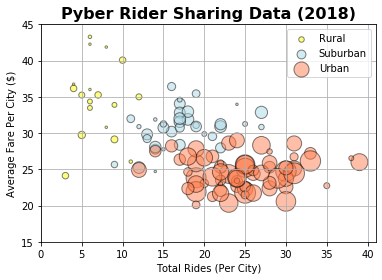

In [43]:
plt.scatter(x_axis2, y_axis2, linewidth=0, marker="o", color="yellow", alpha=0.5, s=size2*6, edgecolor="black", label="Rural", lw=1)
plt.scatter(x_axis3, y_axis3, linewidth=0, marker="o", color="lightblue", alpha=0.5, s=size3*6, edgecolor="black", label="Suburban", lw=1)
plt.scatter(x_axis1, y_axis1, linewidth=0, marker="o", color="coral", alpha=0.5, s=size1*6, edgecolor="black", label="Urban", lw=1)
plt.xlim(0, 41)
plt.ylim(15, 45)
plt.xlabel("Total Rides (Per City)")
plt.ylabel("Average Fare Per City ($)")
plt.title("Pyber Rider Sharing Data (2018)", fontsize=16, fontweight="bold")
plt.legend()
plt.grid()
plt.savefig("Pyber Rider Sharing Data 2018")
plt.show()


## Total Fares by City Type

In [44]:
pie_chart_fares=merged_dataset.groupby(["type"]).sum()["fare"]

In [45]:
labels = ["Rural", "Suburban", "Urban"]
fares = [pie_chart_fares[0], pie_chart_fares[1], pie_chart_fares[2]]

In [46]:
colors = ["yellow", "lightblue", "coral"]
explode = (0, 0, 0.1)

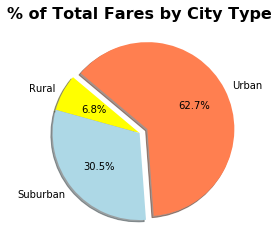

In [48]:
plt.pie(fares, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Fares by City Type", fontsize=16, fontweight="bold")
plt.savefig("% of Total Fares by City Type")
plt.show()

## Total Rides by City Type

In [49]:
pie_chart_rides=merged_dataset.groupby(["type"]).count()["fare"]

In [50]:
labels = ["Rural", "Suburban", "Urban"]
rides = [pie_chart_rides[0], pie_chart_rides[1], pie_chart_rides[2]]

In [51]:
colors = ["yellow", "lightblue", "coral"]
explode = (0, 0, 0.1)

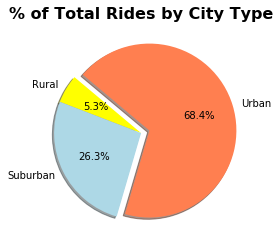

In [52]:
plt.pie(rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Rides by City Type", fontsize=16, fontweight="bold")
plt.savefig("% of Total Rides by City Type")
plt.show()

## Total Drivers by City Type

In [53]:
pie_chart_drivers=city_data.groupby(["type"]).sum()["driver_count"]

In [54]:
labels = ["Rural", "Suburban", "Urban"]
drivers = [pie_chart_drivers[0], pie_chart_drivers[1], pie_chart_drivers[2]]

In [55]:
colors = ["yellow", "lightblue", "coral"]
explode = (0, 0, 0.1)

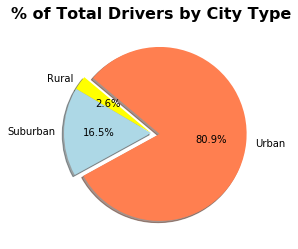

In [56]:
plt.pie(drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% of Total Drivers by City Type", fontsize=16, fontweight="bold")
plt.savefig("% of Total Drivers by City Type")
plt.show()